In [14]:
# Includes & setup
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, sys
%matplotlib notebook

sys.path.append("../include/")
import L01

datapath = os.path.join("../datasets", "lifesat", "")
L01.set_data_path(datapath)

In [15]:
# Prepare the data
country_stats = L01.prepare_country_stats()
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

<IPython.core.display.Javascript object>


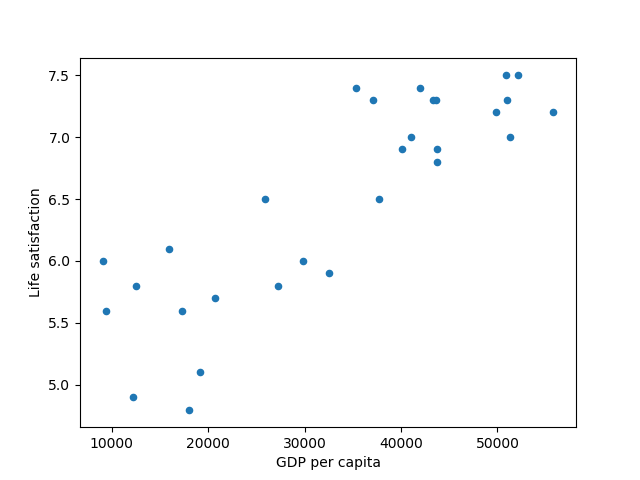

In [16]:
# Plot preprocessed data
L01.plot_country_stats()

In [4]:
# Prepare sample data
full_country_stats = L01.get_full_country_stats()
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

<IPython.core.display.Javascript object>


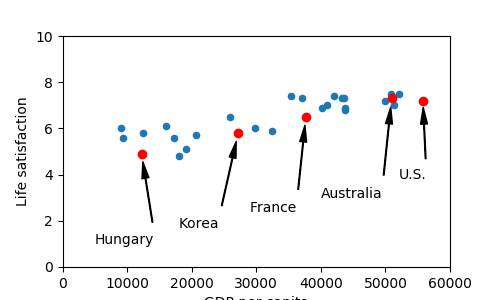

In [17]:
# Plot sample data
L01.plot_sample_data()

In [6]:
# Train linear model
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>


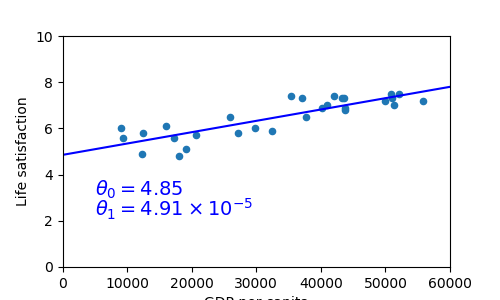

In [18]:
# Plot data & linear model
L01.plot_sample_data_with_linreg()

In [8]:
# Make a prediction for Cyprus
model = lin1
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

[[5.96242338]]


# Qa) 
### The $\theta$ parameters and the $R^2$ Score

Géron uses some $\theta$ parameter from this linear regression model, in his examples and plots above.

How do you extract the $\theta_0$ and $\theta_1$ coefficients in his life-satisfaction figure form the linear regression model?

Read the documentation for the linear regressor at

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Extract the score=0.734 for the model using data (X,y) and explain what $R^2$ score measures in broad terms

$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred}~)^2   ~~~&\small \mbox{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true}~)^2 ~~~&\small \mbox{total sum of squares}
\end{array}
$$

with $y_{true}~$ being the true data, $y_{pred}~$ being the predicted data from the model and $\mu_{true}~$ being the true mean of the data.

What are the minimum and maximum values for $R^2~$?

Is it best to have a low $R^2$ score (a measure of error/loss via a cost-function) or a high  $R^2$ score (a measure of fitness/goodness)? 

NOTE: the $R^2$ is just one of many scoring functions used in ML, we will see plenty more other methods later.

OPTIONAL: Read the additional in-depth literature on $R^2~$:

> https://en.wikipedia.org/wiki/Coefficient_of_determination

# Qa Answers)
$\theta_0$ and $\theta_1$ is computed using the `fit()` method on the linear regression model. Afterwards, these can be extracted as the members of the object (`coef_` and `intercept_`), see below: 

In [19]:
# Find Theta 1
print("Theta one extracted from linear regression object: ", lin1.coef_)
# Find Theta 2
print("Theta zero extracted from linear regression object: ",lin1.intercept_)

# Extract the score from the given dataset and ytrue. 
print("The extracted score: ", lin1.score(X,y))

Theta one extracted from linear regression object:  [[4.91154459e-05]]
Theta zero extracted from linear regression object:  [4.8530528]
The extracted score:  0.7344414355437029


From the above, it is seen that the parameters for the linear regression model is extracted both as the members of the linear regression object, and through it's methods. 

### Description of $R^2~$
$R^2~$ is a score measure of the "goodness of the fit", and will be a scalar value. The value will either be positive or negative, ranging from $-\infty$ to 1; 1 being the best fit. The lower the value is, the "worse" the fit is, with 0 meaning the fit does not account for the original data set. $R^2~$ can be described as a measure of "how far" our regression is from our points living in the column space of the data matrix.  

# Qb) 
### Using k-Nearest Neighbors

Change the linear regression model to a `sklearn.neighbors.KNeighborsRegressor` with k=3 (as in [HOML:p21,bottom]), and rerun the `fit` and `predict` using this new model.

What do the k-nearest neighbours estimate for Cyprus, compared to the linear regression (it should yield=5.77)?

What _score-method_ does the k-nearest model use, and is it comparable to the linear regression model? 

Seek out the documentation in Scikit-learn, if the scoring methods are not equal, can they be compared to each other at all then?

# Qb Answers)

In [20]:
# Train k-nearest model
from sklearn.neighbors import KNeighborsRegressor

knn3 = KNeighborsRegressor(3)
knn3.fit(X,y)

X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = knn3.predict(X_new)
print("y_pred: ", y_pred) # outputs [[]]
print("With the score: ", knn3.score(X,y))

y_pred:  [[5.76666667]]
With the score:  0.8525732853499179


##### What do the k-nearest neighbours estimate for Cyprus, compared to the linear regression (it should yield=5.77)?
As can be seen from the above, the expected life satisfaction according to this model is 5,77, compared to the linear regressions expected 5.96. 

##### What score-method does the k-nearest model use, and is it comparable to the linear regression model? 
As can be seen from the documentation for sklearn.neighbors.KNeighborsRegressor, it uses the $R^2$ scoring method as well - thus the score from this one can be compared to that of the previous regression. From the above output score 0.85, it is seen that the score is closer to 1 than that of the linear regression(0.73), thus the fit of the k-nearest model is expected to be better. 

##### Seek out the documentation in Scikit-learn, if the scoring methods are not equal, can they be compared to each other at all then?
If they are not equal, the scores cannot be compared, as the meaning of the scores varies between methods. 

# Qc) 
### Tuning Parameter for k-Nearest Neighbors and A Sanity Check

But that not the full story. Try plotting the prediction for both models in the same graph and tune the `k_neighbor` parameter of the `KNeighborsRegressor` model.  

Choosing `k_neighbor=1` produces a nice `score=1`, that seems optimal...but is it really so good?

Plotting the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) (the `M` matrix below) and then predict the corresponding y value will sheed some light to this. 

Now reusing the plots stubs below, try to explain why the k-nearest neighbour with `k_neighbor=1` has such a good score.

Does a score=1 with `k_neighbor=1`also mean that this would be the prefered estimator for the job?

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="https://itundervisning.ase.au.dk/E19_itmal/L01/Figs/regression_with_knn.png" style="height:150px">

# Qc Answers)

<IPython.core.display.Javascript object>


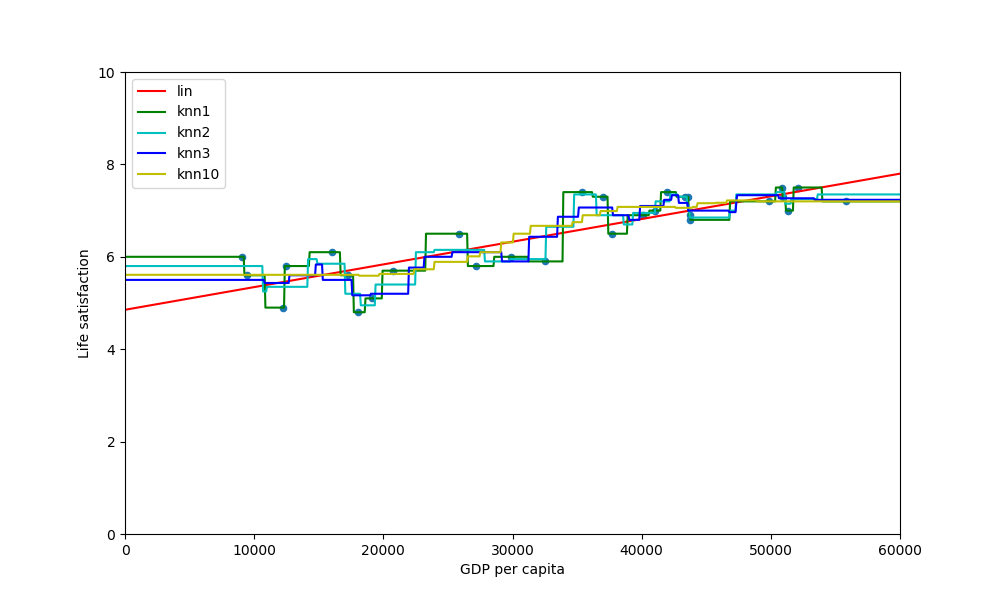

In [21]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(10,6))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)

knn = y_pred_knn = {}

knn[3] = knn3
y_pred_knn[3] = knn3.predict(M)

for n in [1, 2, 10]:
    knn[n] = KNeighborsRegressor(n)
    knn[n].fit(X,y)
    y_pred_knn[n] = knn[n].predict(M)

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r", label='lin')
plt.plot(m, y_pred_knn[1], "g", label='knn1')
plt.plot(m, y_pred_knn[2], "c", label='knn2')
plt.plot(m, y_pred_knn[3], "b", label='knn3')
plt.plot(m, y_pred_knn[10], "y", label='knn10')

plt.legend()

##### Choosing k_neighbor=1 produces a nice score=1, that seems optimal...but is it really so good?
In this case, the result will be over-fitted. This is suboptimal as the kneighbour regressor uses interpolation, and thus as can be seen from the above, there is no normalisation between the points. This means that there really isn't any regression implemented, as the regression just discretely connects the data points. 

##### Does a score=1 with k_neighbor=1also mean that this would be the prefered estimator for the job?
No it does not, as noted above the regressor discretely connects the points, thus, the ability to train the model would be lost, as it would predict the output based only on the input, disregarding the other models current data points. 